In [466]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
from random import shuffle, randint

from sklearn.cross_validation import train_test_split
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [467]:
#read in csv file
data = pd.read_csv("processed.cleveland.csv", header=None)
trainPercent = 40 #must be between 0 and 100
validationPercent = 35
#remove rows with null entries
data.dropna(axis=0, how='any', inplace=True)
numberRowsOf0 = data.loc[data[13] == 0].shape[0]
numberRowsOf1 = data.loc[data[13] == 1].shape[0]
numberRowsOf2 = data.loc[data[13] == 2].shape[0]
numberRowsOf3 = data.loc[data[13] == 3].shape[0]
numberRowsOf4 = data.loc[data[13] == 4].shape[0]
data.head() #look at first 5 rows of the data

0   1   2    3    4   5   6    7   8    9   10   11   12  13
0  63   1   1  145  233   1   2  150   0  2.3   3  0.0  6.0   0
1  67   1   4  160  286   0   2  108   1  1.5   2  3.0  3.0   2
2  67   1   4  120  229   0   2  129   1  2.6   2  2.0  7.0   1
3  37   1   3  130  250   0   0  187   0  3.5   3  0.0  3.0   0
4  41   0   2  130  204   0   2  172   0  1.4   1  0.0  3.0   0

In [468]:
#Grab desired inputs to test one. Build a dataframe from them.
dataInputs= data.loc[:,0:12]
dataInputs.head()

0   1   2    3    4   5   6    7   8    9   10   11   12
0  63   1   1  145  233   1   2  150   0  2.3   3  0.0  6.0
1  67   1   4  160  286   0   2  108   1  1.5   2  3.0  3.0
2  67   1   4  120  229   0   2  129   1  2.6   2  2.0  7.0
3  37   1   3  130  250   0   0  187   0  3.5   3  0.0  3.0
4  41   0   2  130  204   0   2  172   0  1.4   1  0.0  3.0

In [469]:
y1=[]
y2=[]
y3=[]
y4=[]
y5=[]
for i in range(0,numberRowsOf0):
    y1.append([1,0,0,0,0]);#Zero
for i in range(0,numberRowsOf1):
    y2.append([0,1,0,0,0]);#One
for i in range(0,numberRowsOf2):
    y3.append([0,0,1,0,0]);#Second
for i in range(0,numberRowsOf3):
    y4.append([0,0,0,1,0]);#Three
for i in range(0,numberRowsOf4):
    y5.append([0,0,0,0,1]);#Four
expectedOutput=np.concatenate([y1,y2,y3,y4,y5])

In [470]:
#Hint: use train_test_split
inputTrain, inputTest, expectedOutputTrain, expectedOutputTest = train_test_split(dataInputs, expectedOutput, train_size = trainPercent/100, random_state=42)
validateTest, inputTrain, validateOutputTest, expectedOutputTrain = train_test_split(inputTrain, expectedOutputTrain, train_size = validationPercent/100, random_state=42)
#inputTest.head()
print(validateTest.shape)
print(validateOutputTest.shape)
print(inputTrain.shape)
print(expectedOutputTrain.shape)
print(inputTest.shape)
print(expectedOutputTest.shape)

def getClassCountTotals(output):
    d = collections.OrderedDict()
    for a in output:
        t = tuple(a)
        if t in d:
            d[t] += 1
        else:
            d[t] = 1

    result = []
    for (key, value) in d.items():
        result.append(list(key) + [value])

    B = np.asarray(result)
    print(B)
    for Bi in B:
        if Bi[0] == 1:
            zeroTotal = Bi[5]
        elif Bi[1] == 1:
            oneTotal = Bi[5]
        elif Bi[2] == 1:
            twoTotal = Bi[5]
        elif Bi[3] == 1:
            threeTotal = Bi[5]
        elif Bi[4] == 1:
            fourTotal = Bi[5]
            
    return zeroTotal, oneTotal, twoTotal, threeTotal, fourTotal
print(expectedOutputTest)
print("ValidateTest",validateOutputTest)
zeroTotal, oneTotal, twoTotal, threeTotal, fourTotal = getClassCountTotals(expectedOutputTest)
validationCounts = getClassCountTotals(validateOutputTest)
print(zeroTotal)
print(oneTotal)
print(twoTotal)
print(threeTotal)
print(fourTotal)

(41, 13)
(41, 5)
(77, 13)
(77, 5)
(179, 13)
(179, 5)
[[0 1 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [1 0 0 0 0

In [471]:
#Build our least squares classifier for 2 classes
D = inputTrain.shape[1] + 1 #num of attributes, +1 is for the intercept (column of 1s)
K = expectedOutput.shape[1]

In [472]:
expectedOutputTrain = np.asarray(expectedOutputTrain)
expectedOutputTest = np.asarray(expectedOutputTest)
inputTrain = np.asarray(inputTrain)
inputTest = np.asarray(inputTest)
validateTest = np.asarray(validateTest)
validateOutputTest = np.asarray(validateOutputTest)

In [473]:
sum1 = 0
sum2 = 0
def createWeightMatrix(x, y, lmbda):
    numRows = x.shape[0]
    new_col = np.ones((numRows,1))
    augmentedX = np.c_[new_col, x]
    sum1 = np.dot(augmentedX.T, augmentedX) + lmbda
    sum2 = np.dot(augmentedX.T, y)
    W = np.dot(np.linalg.inv(sum1), sum2)
    return W

In [474]:
def classificationTest(xTest, yTest, W, isValidating):  
    returnVals = []
    total = yTest.shape[0]
    predicted = np.zeros((total, K))
    i=0
    zeroCorrect=oneCorrect=twoCorrect=threeCorrect=fourCorrect=totalCorrect=0
    correctPredictionCol = [0]*total
    for i in range(total):      
        x = xTest[i]        
        x = np.append(1,x)         
        x = x.reshape(1,D)        
        values = np.dot(W.T,x.T)
        values = values.T
        values = values.flatten()
        maxIndex = np.argmax(values)
        if yTest[i][maxIndex] == 1:
            if maxIndex == 0:
                zeroCorrect += 1
            elif maxIndex == 1:
                oneCorrect += 1
            elif maxIndex == 2:
                twoCorrect += 1
            elif maxIndex == 3:
                threeCorrect +=1
            elif maxIndex == 4:
                fourCorrect +=1
            correctPredictionCol[i] = 1
        predicted[i][maxIndex] = 1
    totalCorrect = zeroCorrect + oneCorrect + twoCorrect + threeCorrect + fourCorrect
    print(totalCorrect)
    totalAccuracy=totalCorrect/float(total)*100
    if isValidating == False:
        zeroAccuracy = zeroCorrect/float(zeroTotal)*100
        oneAccuracy = oneCorrect/float(oneTotal)*100
        twoAccuracy = twoCorrect/float(twoTotal)*100
        threeAccuracy = threeCorrect/float(threeTotal)*100
        fourAccuracy = fourCorrect/float(fourTotal)*100
        print("zero misclassification error = ", 100 - zeroAccuracy)
        print("one misclassification error = ", 100 - oneAccuracy)
        print("two misclassification error = ", 100 - twoAccuracy)
        print("three misclassification error = ", 100 - threeAccuracy)
        print("four misclassification error = ", 100 - fourAccuracy)
    else:
        zeroAccuracy = zeroCorrect/float(validationCounts[0])*100
        oneAccuracy = oneCorrect/float(validationCounts[1])*100
        twoAccuracy = twoCorrect/float(validationCounts[2])*100
        threeAccuracy = threeCorrect/float(validationCounts[3])*100
        fourAccuracy = fourCorrect/float(validationCounts[4])*100
        print("zero misclassification error = ", 100 - zeroAccuracy)
        print("one misclassification error = ", 100 - oneAccuracy)
        print("two misclassification error = ", 100 - twoAccuracy)
        print("three misclassification error = ", 100 - threeAccuracy)
        print("four misclassification error = ", 100 - fourAccuracy)
    print("total misclassification error = ", 100 - totalAccuracy)
    print(total)
    returnVals.append(100-totalAccuracy)
    returnVals.append(predicted)
    returnVals.append(correctPredictionCol)
    return returnVals

In [475]:
#cross validation
lambdaValues = [1, 0,.1 , .3, .01, .03, .001, .003, .0001, .0003]
totalErrorValues = []
lambdaIndexOfMinError = -1
minError = 101
i = 0
for l in lambdaValues :
    print("lambda val?",l)
    W=0
    W = createWeightMatrix(inputTrain, expectedOutputTrain, l)
    print("W",W)
    error, predictedClasses, correctPredCol = classificationTest(validateTest, validateOutputTest, W, True)
    totalErrorValues.append(error)
    print("error ",error)    
    if(error < minError):
        minError = error
        lambdaIndexOfMinError = i
    i+=1
print("smalled index of error for lambda...", lambdaIndexOfMinError)

Wtest = createWeightMatrix(inputTrain, expectedOutputTrain, lambdaValues[lambdaIndexOfMinError])

lambda val? 1
W [[ -5.39581004e-01   3.51515199e-02   4.77999661e-01   2.18276415e-01
    2.57319806e-03]
 [  6.32201056e-03  -7.05366459e-03  -5.45685515e-03   8.94784681e-03
   -3.36587035e-04]
 [  1.72218548e-02  -1.32493904e-02  -4.69412385e-02   6.79510518e-02
   -2.46899264e-02]
 [ -2.06141176e-02   1.77336650e-02   5.33904226e-02   1.92158019e-03
   -4.13150992e-02]
 [ -2.38255321e-03   3.22485252e-03   2.06598401e-03  -2.58202683e-03
    1.15302582e-03]
 [ -5.92449132e-04   1.36122091e-03   2.72361768e-04  -1.08953318e-04
   -7.83573622e-04]
 [  1.95488435e-01  -2.34492488e-02  -2.30987434e-01  -3.82377028e-02
    6.33973144e-02]
 [  7.08519654e-02  -1.58935701e-02  -3.62100270e-02  -4.42396184e-02
    2.38254623e-02]
 [  5.10192131e-03  -1.82726621e-03  -1.84707167e-03   4.39615320e-04
    2.20382755e-04]
 [  2.80651655e-02   3.67137937e-02   3.55831016e-02  -7.56402730e-02
   -2.97320470e-02]
 [  2.67395239e-03  -1.33656825e-02  -3.35061566e-02   2.49222108e-02
    1.90269224

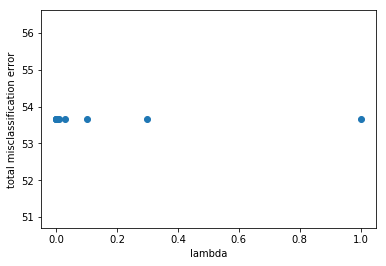

In [476]:
plt.plot(lambdaValues, totalErrorValues, 'o')
plt.xlabel('lambda')
plt.ylabel('total misclassification error')
plt.draw()
plt.show()

In [477]:
#testing
error, predictedClasses, correctPredictionCol = classificationTest(inputTest, expectedOutputTest, Wtest, False)
print(error)

97
zero misclassification error =  5.050505050505052
one misclassification error =  94.11764705882354
two misclassification error =  100.0
three misclassification error =  95.0
four misclassification error =  100.0
total misclassification error =  45.81005586592178
179
45.81005586592178


In [478]:
actual = pd.DataFrame(expectedOutputTest)
predictedDF = pd.DataFrame(predictedClasses)
correct = pd.DataFrame(correctPredictionCol)
frames = [predictedDF, actual, correct]
modelTest = pd.concat(frames, axis=1)
modelTest.columns = ["Predicted","Predicted", "Predicted", "Predicted", "Predicted", "Actual", "Actual", "Actual", "Actual", "Actual", "Correct"]
modelTest

Predicted  Predicted  Predicted  Predicted  Predicted  Actual  Actual  \
0          1.0        0.0        0.0        0.0        0.0       0       1   
1          1.0        0.0        0.0        0.0        0.0       0       1   
2          1.0        0.0        0.0        0.0        0.0       1       0   
3          0.0        0.0        0.0        1.0        0.0       1       0   
4          1.0        0.0        0.0        0.0        0.0       1       0   
5          1.0        0.0        0.0        0.0        0.0       1       0   
6          1.0        0.0        0.0        0.0        0.0       0       1   
7          1.0        0.0        0.0        0.0        0.0       1       0   
8          1.0        0.0        0.0        0.0        0.0       1       0   
9          1.0        0.0        0.0        0.0        0.0       1       0   
10         1.0        0.0        0.0        0.0        0.0       0       0   
11         1.0        0.0        0.0        0.0        0.0       1       0   
12         1.0        0.0        0.0        0.0        0.0       1       0   
13         1.0        0.0        0.0        0.0        0.0       1       0   
14         0.0        0.0        0.0        1.0        0.0       1       0   
15         1.0        0.0        0.0        0.0        0.0       0       0   
16         1.0        0.0        0.0        0.0        0.0       0       0   
17         1.0        0.0        0.0        0.0        0.0       1       0   
18         1.0        0.0        0.0        0.0        0.0       0       0   
19         1.0        0.0        0.0        0.0        0.0       1       0   
20         1.0        0.0        0.0        0.0        0.0       0       0   
21         1.0        0.0        0.0        0.0        0.0       1       0   
22         1.0        0.0        0.0        0.0        0.0       1       0   
23         0.0        0.0        0.0        1.0        0.0       1       0   
24         1.0        0.0        0.0        0.0        0.0       0       0   
25         1.0        0.0        0.0        0.0        0.0       0       0   
26         1.0        0.0        0.0        0.0        0.0       0       1   
27         1.0        0.0        0.0        0.0        0.0       0       0   
28         1.0        0.0        0.0        0.0        0.0       1       0   
29         1.0        0.0        0.0        0.0        0.0       0       0   
..         ...        ...        ...        ...        ...     ...     ...   
149        1.0        0.0        0.0        0.0        0.0       0       0   
150        1.0        0.0        0.0        0.0        0.0       1       0   
151        1.0        0.0        0.0        0.0        0.0       0       0   
152        1.0        0.0        0.0        0.0        0.0       0       1   
153        1.0        0.0        0.0        0.0        0.0       0       0   
154        1.0        0.0        0.0        0.0        0.0       1       0   
155        1.0        0.0        0.0        0.0        0.0       0       1   
156        1.0        0.0        0.0        0.0        0.0       1       0   
157        1.0        0.0        0.0        0.0        0.0       0       1   
158        1.0        0.0        0.0        0.0        0.0       1       0   
159        1.0        0.0        0.0        0.0        0.0       1       0   
160        1.0        0.0        0.0        0.0        0.0       1       0   
161        1.0        0.0        0.0        0.0        0.0       1       0   
162        1.0        0.0        0.0        0.0        0.0       0       0   
163        1.0        0.0        0.0        0.0        0.0       0       0   
164        0.0        1.0        0.0        0.0        0.0       0       0   
165        1.0        0.0        0.0        0.0        0.0       1       0   
166        1.0        0.0        0.0        0.0        0.0       1       0   
167        1.0        0.0        0.0        0.0        0.0       0       1   
168        1.0        0.0  

In [479]:
actualAsClassNumber = [0]*expectedOutputTest.shape[0]
predictedAsClassNumber = [0]*expectedOutputTest.shape[0]
for i in range(expectedOutputTest.shape[0]):
    actualAsClassNumber[i] = expectedOutputTest[i].tolist().index(1)
    predictedAsClassNumber[i] = predictedClasses[i].tolist().index(1.0)
confusion_matrix(actualAsClassNumber, predictedAsClassNumber)

array([[94,  0,  1,  4,  0],
       [31,  2,  1,  0,  0],
       [18,  1,  0,  1,  0],
       [17,  2,  0,  1,  0],
       [ 6,  0,  0,  0,  0]])

In [480]:
clf = svm.SVC(kernel='linear', C=1)
expectedOutputSVM = data.loc[:,13]
inputTrain, inputTest, expectedOutputTrain, expectedOutputTest = train_test_split(dataInputs, expectedOutputSVM, train_size = trainPercent/100, random_state=42)
clf.fit(inputTrain, expectedOutputTrain)
accuracy = clf.score(inputTest, expectedOutputTest)
print(accuracy)

0.525139664804


In [481]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier

In [482]:
#SVM One vs all classifier
clf = Pipeline([
    ('clf', OneVsRestClassifier(LinearSVC()))])
model = clf.fit(inputTrain, expectedOutputTrain)
accuracy = clf.score(inputTest, expectedOutputTest)
print(accuracy)
svmPredicted = model.predict(inputTest)
confusion_matrix(expectedOutputTest,svmPredicted)

0.162011173184


array([[ 6,  0,  0, 81,  0],
       [ 0,  0,  0, 38,  0],
       [ 0,  0,  0, 24,  0],
       [ 0,  0,  0, 23,  0],
       [ 0,  0,  0,  7,  0]])